In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math    #for using floor in creating minibatches


#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import prep_dataset, rand_mini_batches

from finalModelUtils import *
from ffnn import *

np.random.seed(1)
%matplotlib inline

## Loading Datasets

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

In [3]:
#loading Sample dataset
sample_size = 100
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 100%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(60000, 28, 28)
Training Set Labels:	(60000, 1)		(60000, 1)
Training Set Images:	(5000, 28, 28)		(5000, 28, 28)
Training Set Labels:	(5000, 1)		(5000, 1)
Test Set Images:	(5000, 28, 28)		(5000, 28, 28)
Test Set Labels:	(5000, 1)		(5000, 1)


## Preparing Datasets

In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_sample.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_sample.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_sample.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_sample.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_sample.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_sample.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(60000, 28, 28)		(784, 60000)
Training Set Labels:	(60000, 1)		(10, 60000)
Dev Set Images:		(5000, 28, 28)		(784, 5000)
Dev Set Labels:		(5000, 1)		(10, 5000)
Test Set Images:	(5000, 28, 28)		(784, 5000)
Test Set Labels:	(5000, 1)		(10, 5000)


## Model Implementation

In [5]:
layers_dim = init_layers(train_x_norm, train_y_encoded, hidden_layers = [800,300])

In [6]:
hyperParams = init_hyperParams(alpha = 0.001, num_epoch = 25, mini_batch_size = 128,lambd = 0.9,keep_probs = [0.8,0.8,])


Epoch: 1/25
60000/60000 [==========> 100%] - 800.42s | loss: 0.0830 | acc: 0.9745 | Val loss: 0.0996 | Val acc: 0.9690 
Epoch: 2/25
60000/60000 [==========> 100%] - 808.56s | loss: 0.0463 | acc: 0.9862 | Val loss: 0.0793 | Val acc: 0.9754 
Epoch: 3/25
60000/60000 [==========> 100%] - 806.87s | loss: 0.0287 | acc: 0.9921 | Val loss: 0.0644 | Val acc: 0.9802 
Epoch: 4/25
60000/60000 [==========> 100%] - 802.68s | loss: 0.0334 | acc: 0.9891 | Val loss: 0.0786 | Val acc: 0.9758 
Epoch: 5/25
60000/60000 [==========> 100%] - 806.70s | loss: 0.0144 | acc: 0.9957 | Val loss: 0.0563 | Val acc: 0.9830 
Epoch: 6/25
60000/60000 [==========> 100%] - 814.70s | loss: 0.0193 | acc: 0.9936 | Val loss: 0.0824 | Val acc: 0.9788 
Epoch: 7/25
60000/60000 [==========> 100%] - 802.10s | loss: 0.0130 | acc: 0.9954 | Val loss: 0.0817 | Val acc: 0.9796 
Epoch: 8/25
60000/60000 [==========> 100%] - 799.53s | loss: 0.0176 | acc: 0.9940 | Val loss: 0.0892 | Val acc: 0.9800 
Epoch: 9/25
60000/60000 [==========> 10

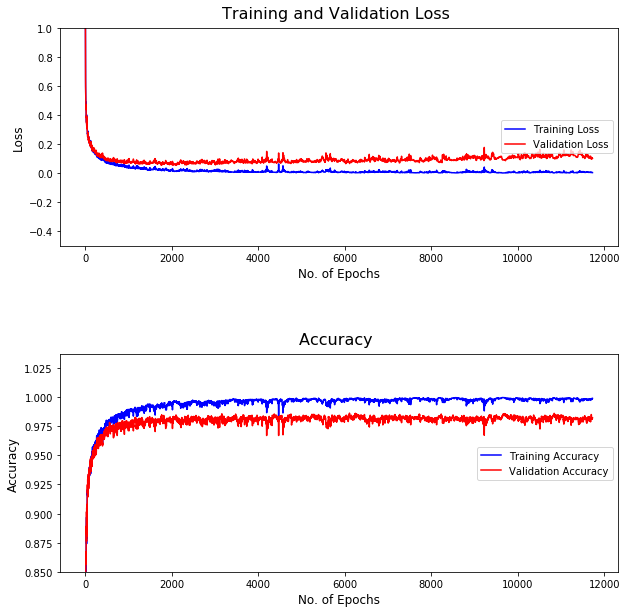

In [7]:
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam',regularizer = None)

## Making Predictions

In [8]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,parameters)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,parameters)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,parameters)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")

+===========+===========+===============+
| Dataset   | Accuracy 	| Error Rate 	|
+===========+===========+===============+
| Training  | 0.9988 	| 0.0012 	|
| Dev       | 0.9822 	| 0.0178 	|
| Test      | 0.9820 	| 0.0180 	|
+===========+===========+===============+


## Confusion Matrix

In [9]:
cm_train = confusion_matrix(train_y_sample,prediction_train)

cm_dev = confusion_matrix(dev_y_sample,prediction_dev)

cm_test = confusion_matrix(test_y_sample,prediction_test)

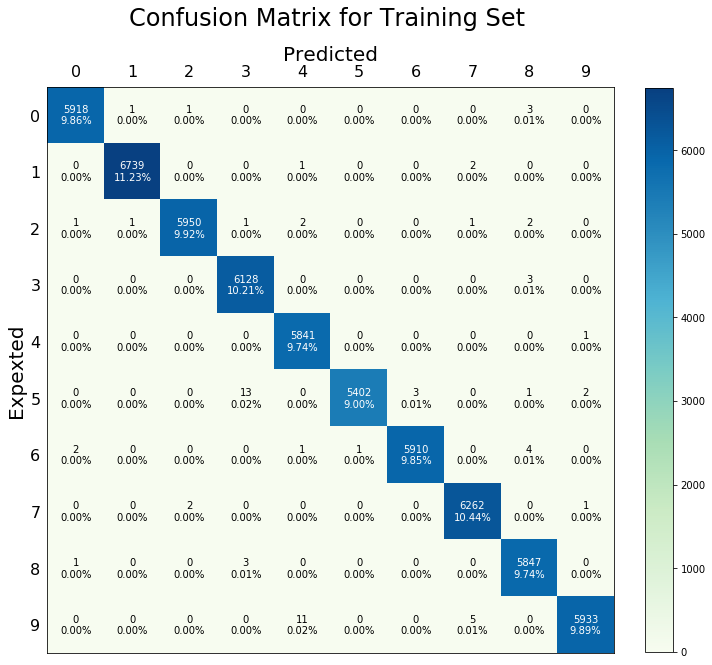

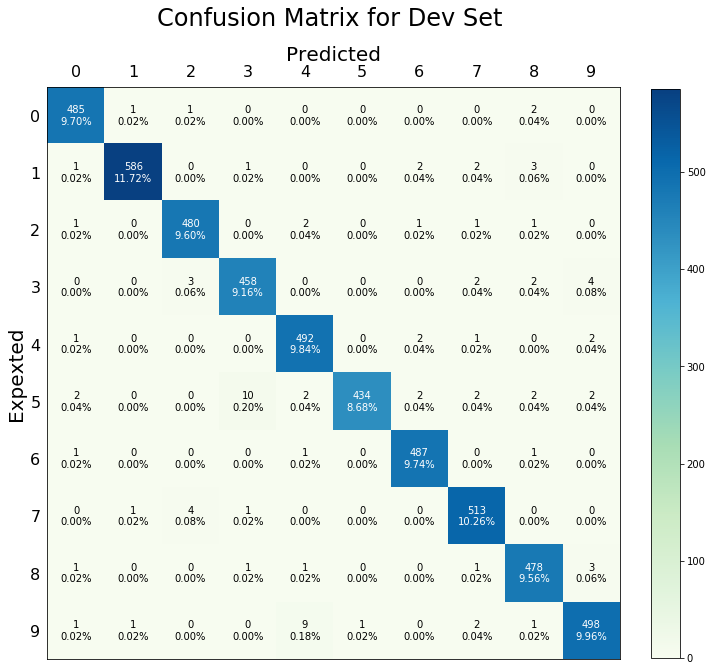

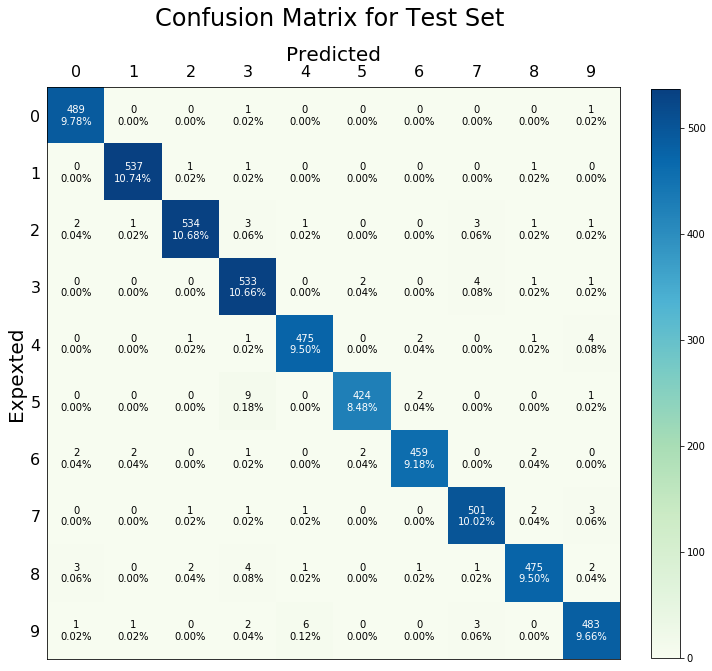

In [10]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train, dataset = "training")
plot_confusion_matrix(cm_dev, dataset = "dev")
plot_confusion_matrix(cm_test, dataset = "test")

## Prediction Summary

In [11]:
train_metrics, train_macro_metrics, train_acc = model_metrics(cm_train)
metric_summary(train_metrics, train_macro_metrics, train_acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.99932 	|  0.99916 	|  0.99924 	|
| 1 		|  0.99970 	|  0.99956 	|  0.99963 	|
| 2 		|  0.99950 	|  0.99866 	|  0.99908 	|
| 3 		|  0.99723 	|  0.99951 	|  0.99837 	|
| 4 		|  0.99744 	|  0.99983 	|  0.99863 	|
| 5 		|  0.99981 	|  0.99650 	|  0.99815 	|
| 6 		|  0.99949 	|  0.99865 	|  0.99907 	|
| 7 		|  0.99872 	|  0.99952 	|  0.99912 	|
| 8 		|  0.99778 	|  0.99932 	|  0.99855 	|
| 9 		|  0.99933 	|  0.99731 	|  0.99832 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.99883 	|  0.99880 	|  0.99882 	|
+===============+===============+===============+===============+

 Accuracy 		  0.99883


In [12]:
dev_metrics, dev_macro_metrics, dev_acc = model_metrics(cm_dev)
metric_summary(dev_metrics, dev_macro_metrics, dev_acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.98377 	|  0.99182 	|  0.98778 	|
| 1 		|  0.99491 	|  0.98487 	|  0.98986 	|
| 2 		|  0.98361 	|  0.98765 	|  0.98563 	|
| 3 		|  0.97240 	|  0.97655 	|  0.97447 	|
| 4 		|  0.97041 	|  0.98795 	|  0.97910 	|
| 5 		|  0.99770 	|  0.95175 	|  0.97419 	|
| 6 		|  0.98583 	|  0.99388 	|  0.98984 	|
| 7 		|  0.97901 	|  0.98844 	|  0.98370 	|
| 8 		|  0.97551 	|  0.98557 	|  0.98051 	|
| 9 		|  0.97839 	|  0.97076 	|  0.97456 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.98215 	|  0.98192 	|  0.98196 	|
+===============+===============+===============+===============+

 Accuracy 		  0.98220


In [13]:
test_metrics, test_macro_metrics, test_acc = model_metrics(cm_test)
metric_summary(test_metrics, test_macro_metrics, test_acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.98390 	|  0.99593 	|  0.98988 	|
| 1 		|  0.99261 	|  0.99444 	|  0.99352 	|
| 2 		|  0.99072 	|  0.97802 	|  0.98433 	|
| 3 		|  0.95863 	|  0.98521 	|  0.97174 	|
| 4 		|  0.98140 	|  0.98140 	|  0.98140 	|
| 5 		|  0.99065 	|  0.97248 	|  0.98148 	|
| 6 		|  0.98922 	|  0.98077 	|  0.98498 	|
| 7 		|  0.97852 	|  0.98428 	|  0.98139 	|
| 8 		|  0.98344 	|  0.97137 	|  0.97737 	|
| 9 		|  0.97379 	|  0.97379 	|  0.97379 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.98229 	|  0.98177 	|  0.98199 	|
+===============+===============+===============+===============+

 Accuracy 		  0.98200


## Visualizing Prediction

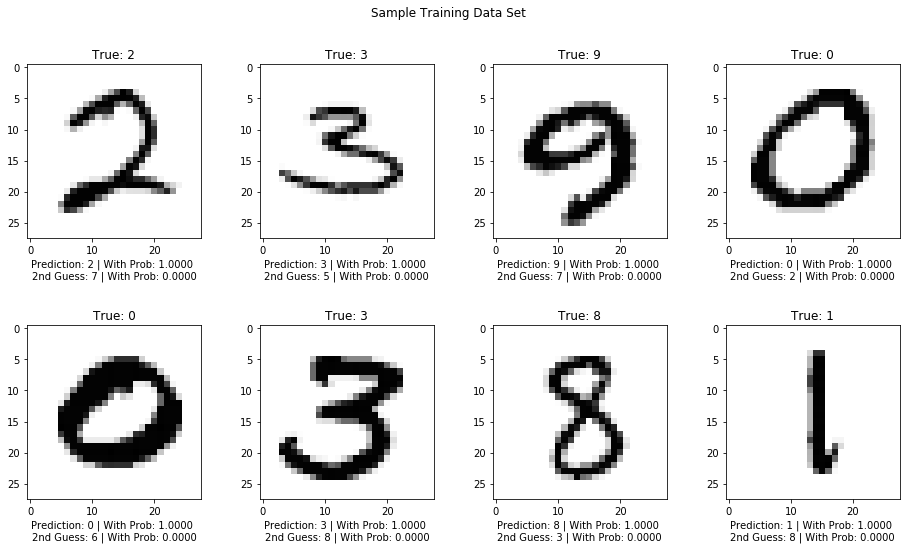

In [22]:
visualize_prediction(train_x_sample, train_y_sample.T, prediction_train, dataset = "training")

## Visualizing Mislabelled Images

Total Mislabelled Images: 70


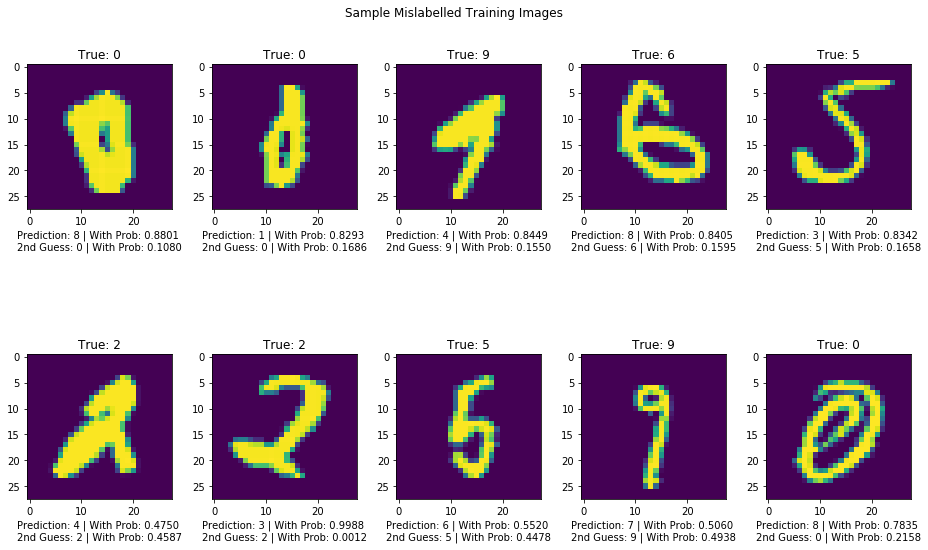

In [21]:
visualize_mislabelled_images(train_x_sample, train_y_sample.T,prediction_train,dataset = "training")

## Making Prediction on Real World Image

In [19]:
from PIL import Image
from dataPrep import one_hot_encoding

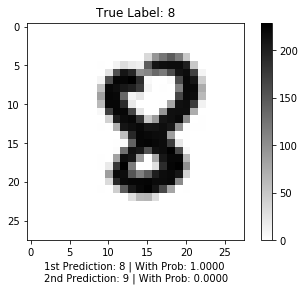

In [24]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

prediction,acc,_ = predict(image_norm, label_encoded, parameters)
    

first_lbl, first_prob = prediction["First Prediction"]
sec_lbl, sec_prob = prediction["Second Prediction"]

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("1st Prediction: %d | With Prob: %.4f \n2nd Prediction: %d | With Prob: %.4f"%(first_lbl, first_prob, sec_lbl, sec_prob))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')
plt.colorbar()


## Saving Trained Model

In [15]:
import datetime
d = datetime.datetime.now()

file_name = str(d) + " test_final_model_adam"
print(file_name)
print(hyperParams)
#hyper parameter not saved along with any past model so loading may be different
params = {"hyperParams":hyperParams,
         "parameters": parameters
        }

save_model(file_name = file_name, parameters = params)

2020-05-05 08:23:50.731266 test_final_model_adam
{'learning_rate': 0.001, 'num_epoch': 25, 'mini_batch_size': 128, 'lambda': 0.9, 'keep_probs': [0.8, 0.8], 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08}


## Loading Pre-Trained Model

In [16]:
# loaded_params = load_model(file_name = "final_model_adam_dropout") ##past saved model
loaded_params = load_model(file_name = "2020-05-05 08:23:50.731266 test_final_model_adam")
trained_params = loaded_params["parameters"]
trained_hyper_params = loaded_params["hyperParams"]

In [17]:
L = len(trained_params) // 2
print("Total Layers %d: "%L)

for l in range(L):
    print(trained_params["W" + str(l+1)].shape)
print(trained_hyper_params)

Total Layers 3: 
(800, 784)
(300, 800)
(10, 300)
{'learning_rate': 0.001, 'num_epoch': 25, 'mini_batch_size': 128, 'lambda': 0.9, 'keep_probs': [0.8, 0.8], 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08}


In [18]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,trained_params)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,trained_params)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,trained_params)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")

+===========+===========+===============+
| Dataset   | Accuracy 	| Error Rate 	|
+===========+===========+===============+
| Training  | 0.9988 	| 0.0012 	|
| Dev       | 0.9822 	| 0.0178 	|
| Test      | 0.9820 	| 0.0180 	|
+===========+===========+===============+


In [ ]:
cm_train = confusion_matrix(train_y_sample,prediction_train)

cm_dev = confusion_matrix(dev_y_sample,prediction_dev)

cm_test = confusion_matrix(test_y_sample,prediction_test)

In [ ]:
metrics, macro_metrics, acc = model_metrics(cm_train)

In [ ]:
metric_summary(metrics, macro_metrics, acc)

In [ ]:
print(macro_metrics)